# Chapitre 2 : Analyser les rendements et la volatilité

## Objectif général

À l’issue de ce chapitre, vous saurez :
- Calculer et interpréter les rendements (simples, cumulés)
- Mesurer et représenter la volatilité d’un actif
- Utiliser des visualisations pour suivre et comparer des performances financières
- Consolider vos acquis via un quiz et un défi de code


## 1. Importer les données d'Apple


In [1]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apple = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
print(apple.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582893  72.621631  70.876060  71.127851  118387200
2020-01-07  72.241531  72.849208  72.021215  72.592578  108872000
2020-01-08  73.403633  73.706264  71.943744  71.943744  132079200


## 2. Calculer les rendements et performances

Le **rendement** mesure la variation relative du prix d’un actif entre deux périodes. C’est un indicateur clé de performance.

$$
 R_t = (P_t - P_{t-1}) / P_{t-1} = (P_t / P_{t-1}) - 1
$$

Où :
- $( R_t $) est le rendement à la date \( t \)
- $( P_t $) est le prix de clôture à la date \( t \)
- $( P_{t-1} $) est le prix de clôture à la date précédente


In [3]:

# Calcul manuel du rendement simple
apple['DailyReturn_manual'] = (apple['Close'] - apple['Close'].shift(1)) / apple['Close'].shift(1)

apple['DailyReturn_manual'].head()

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: DailyReturn_manual, dtype: float64

In [4]:
# Calcul du rendement quotidien avec pct_change
apple['DailyReturn_pct_change'] = apple['Close'].pct_change()
apple['DailyReturn_pct_change'].head()

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: DailyReturn_pct_change, dtype: float64

In [5]:
apple['diff'] = apple['DailyReturn_pct_change'] - apple['DailyReturn_manual'] # Calcul de la différence entre les deux méthodes
print(apple['diff'].abs().max()) # Afficher la valeur maximale de la différence

1.1102230246251565e-16


In [6]:
apple.head()


Price,Close,High,Low,Open,Volume,DailyReturn_manual,DailyReturn_pct_change,diff
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,NaN
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722,-0.009722,2.775558e-17
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200,0.007968,0.007968,-3.122502e-17
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,-0.004703,-0.004703,2.081668e-17
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,0.016086,0.016086,9.367507e-17


In [7]:
apple['DailyReturn_pct_change'].describe()

count    1256.000000
mean        0.001189
std         0.019962
min        -0.128647
25%        -0.008426
50%         0.001210
75%         0.012017
max         0.119808
Name: DailyReturn_pct_change, dtype: float64

## 3. Visualiser les rendements

<Figure size 1000x400 with 0 Axes>

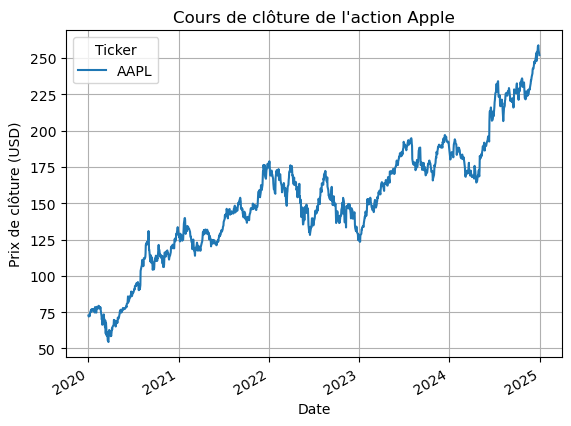

In [8]:
# Visualisation du prix de clôture d'Apple
plt.figure(figsize=(10, 4))
apple['Close'].plot(title="Cours de clôture de l'action Apple")
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.grid(True)
plt.show()

In [9]:
import plotly.graph_objects as go

# Préparation des données
plot_data = apple.copy()
plot_data.columns = plot_data.columns.droplevel('Ticker')
plot_data = plot_data.reset_index()

# Créer le graphique
fig = go.Figure()

# Tracer le cours de clôture
fig.add_trace(go.Scatter(
    x=plot_data['Date'],
    y=plot_data['Close'],
    mode='lines',
    name="Cours de clôture",
    line=dict(color='royalblue')
))

# Personnalisation pour ressembler à matplotlib
fig.update_layout(
    title="Cours de clôture de l'action Apple",
    xaxis_title='Date',
    yaxis_title='Prix de clôture (USD)',
    template='plotly_white',
    height=400,
    width=1000,
    showlegend=False,  # Comme dans matplotlib où la légende n’est pas affichée par défaut
)

# Afficher la grille (similaire à plt.grid(True))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Afficher le graphique
fig.show()


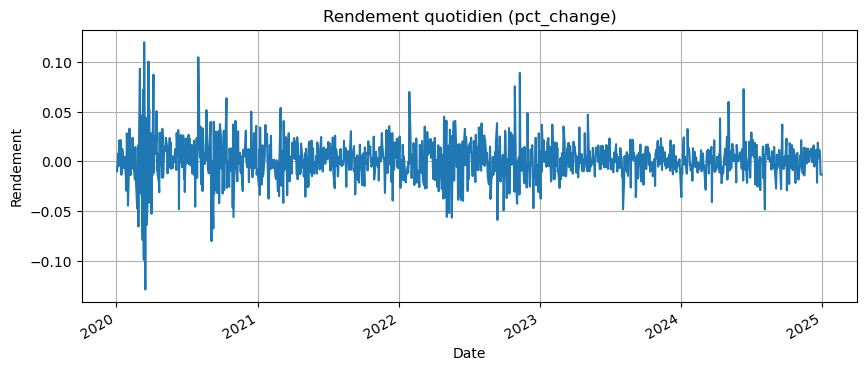

In [10]:
# --- Visualisation des rendements quotidiens calculés par pct_change avec matplotlib ---
# Visualiser le rendement calculé avec pct_change
plt.figure(figsize=(10, 4))  # Création d'une figure
apple['DailyReturn_pct_change'].plot(title="Rendement quotidien (pct_change)")  # Tracer la courbe des rendements calculés automatiquement")
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.grid(True)
plt.show()

In [11]:
# --- Visualisation des rendements quotidiens calculés par pct_change avec plotly ---
import plotly.express as px
fig = px.line(apple, x=apple.index, y='DailyReturn_pct_change', title="Rendement quotidien (pct_change) avec Plotly")
fig.show()

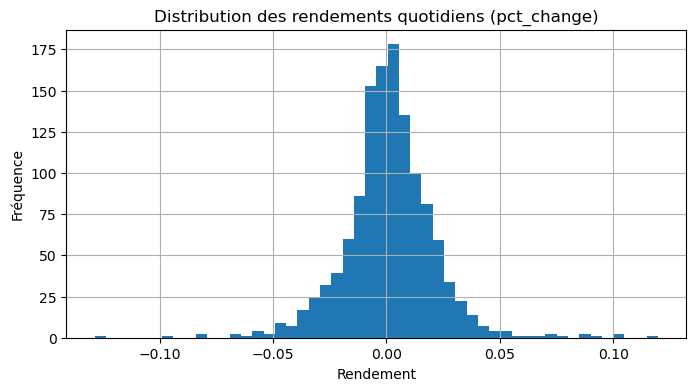

In [12]:
# --- Histogramme du rendement calculé automatiquement (pct_change) ---
apple['DailyReturn_pct_change'].hist(bins=50, figsize=(8, 4))
plt.title("Distribution des rendements quotidiens (pct_change)")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

## 4. Mesurer et analyser les rendements cumulés


Le **rendement cumulé** mesure la performance globale d’un actif dans le temps. Il permet d’observer l’effet composé des rendements successifs.

#### Formule :
$$
RC_t = \prod_{i=1}^{t} (1 + R_i)
$$

Où :
- $( RC_t $) est le rendement cumulé jusqu’au jour $( t $)
- $( R_i $) est le rendement du jour \( i \)

Cela donne une vue d’ensemble de la croissance ou décroissance d’un actif sur une période donnée.

In [13]:
apple['CumulativeReturn'] = (1 + apple['DailyReturn_pct_change']).cumprod()
apple.head()

Price,Close,High,Low,Open,Volume,DailyReturn_manual,DailyReturn_pct_change,diff,CumulativeReturn
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,NaN,NaN
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722,-0.009722,2.775558e-17,0.990278
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200,0.007968,0.007968,-3.122502e-17,0.998169
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,-0.004703,-0.004703,2.081668e-17,0.993474
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,0.016086,0.016086,9.367507e-17,1.009456


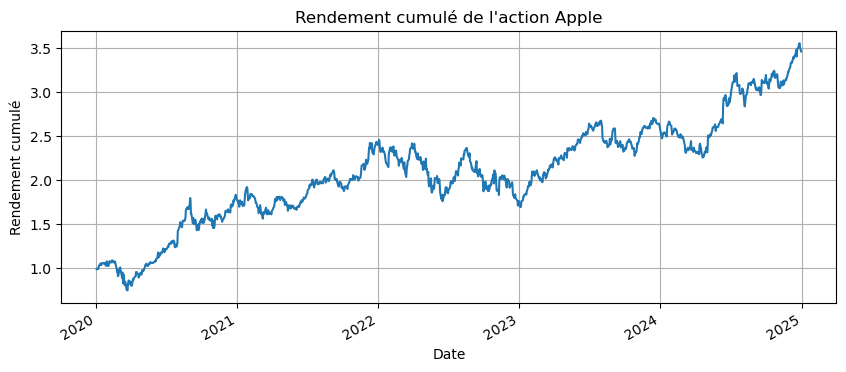

In [14]:
# Affichage
plt.figure(figsize=(10, 4))
apple['CumulativeReturn'].plot(title="Rendement cumulé de l'action Apple")
plt.xlabel('Date')
plt.ylabel('Rendement cumulé')
plt.grid(True)
plt.show()

In [15]:
# Visualisation du rendement cumulé avec Plotly
import plotly.express as px
fig = px.line(apple, x=apple.index, y='CumulativeReturn', title="Rendement cumulé de l'action Apple (Plotly)", labels={'CumulativeReturn': 'Rendement cumulé'})
fig.show()

## 5. Mesurer et interpréter la volatilité
La **volatilité** mesure l’ampleur des fluctuations du rendement d’un actif. C’est un indicateur clé du **risque** financier : plus elle est élevée, plus l’actif est instable.

$$
\sigma_t = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (R_i - \overline{R})^2}
$$

Où :
- $( \sigma_t $) est la volatilité à l’instant \( t \)
- $( R_i $) les rendements observés
- $( \overline{R} $) la moyenne des rendements
- $( N $) le nombre total de périodes


La volatilité calculée à partir des rendements journaliers donne une vision du **risque à court terme**.  
Cependant, les investisseurs et analystes raisonnent souvent à **l’année**.  

Pour rendre la volatilité **comparable** à d’autres actifs ou périodes, on l’**annualise**.

On utilise généralement la racine du nombre de jours de bourse par an (≈ 252 jours) :

$$
\sigma_{\text{annuelle}} = \sigma_{\text{journalière}} \times \sqrt{252}
$$

Cela permet d’exprimer la volatilité sous forme de **pourcentage annuel**, ce qui est plus parlant dans un contexte d’investissement.

In [16]:
# Calcul de la volatilité glissante sur 21 jours (volatilité non annualisée)
apple['Volatility_daily'] = apple['DailyReturn_pct_change'].rolling(window=21).std()#(environ 1 mois de bourse)@
apple

Price,Close,High,Low,Open,Volume,DailyReturn_manual,DailyReturn_pct_change,diff,CumulativeReturn,Volatility_daily
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,NaN,NaN,NaN
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722,-0.009722,2.775558e-17,0.990278,NaN
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200,0.007968,0.007968,-3.122502e-17,0.998169,NaN
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,-0.004703,-0.004703,2.081668e-17,0.993474,NaN
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,0.016086,0.016086,9.367507e-17,1.009456,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,0.003065,0.003065,-3.946496e-17,3.506648,0.008669
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478,0.011478,1.058181e-16,3.546898,0.008772


In [17]:
# Annualisation de la volatilité (multiplication par racine de 252)
apple['Volatility_annualized'] = apple['Volatility_daily'] * (252 ** 0.5)
apple.head()

Price,Close,High,Low,Open,Volume,DailyReturn_manual,DailyReturn_pct_change,diff,CumulativeReturn,Volatility_daily,Volatility_annualized
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722,-0.009722,2.775558e-17,0.990278,NaN,NaN
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200,0.007968,0.007968,-3.122502e-17,0.998169,NaN,NaN
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,-0.004703,-0.004703,2.081668e-17,0.993474,NaN,NaN
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,0.016086,0.016086,9.367507e-17,1.009456,NaN,NaN


In [18]:

# Affichage de la volatilité non moyenne
print("Volatilité  moyenne :", round(apple['Volatility_daily'].mean() * 100, 2), "%") 



Volatilité  moyenne : 1.81 %


In [19]:
# Affichage de la statistique moyenne
print("Volatilité annualisée moyenne :", round(apple['Volatility_annualized'].mean() * 100, 2), "%")

Volatilité annualisée moyenne : 28.79 %
